In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV for edge detection
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
# Function to preprocess and extract Laplacian edge features
def extract_laplacian_features(images):
    edge_features = []
    for image in images:
        # Convert to grayscale
        gray = rgb2gray(image)
        # Resize to 32x32 for consistency
        resized = resize(gray, (32, 32))
        # Apply Laplacian edge detection
        laplacian = cv2.Laplacian((resized * 255).astype(np.uint8), cv2.CV_64F)
        # Flatten the edge map into a feature vector
        edge_features.append(laplacian.flatten())
    return np.array(edge_features)

In [5]:
# Extract Laplacian edge features for training and testing images (subset for efficiency)
X_train_lap = extract_laplacian_features(X_train[:5000])
X_test_lap = extract_laplacian_features(X_test[:1000])

In [6]:
# Normalize features
scaler = StandardScaler()
X_train_lap = scaler.fit_transform(X_train_lap)
X_test_lap = scaler.transform(X_test_lap)

In [7]:
# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train_lap, y_train[:5000])  # Train on subset

RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
# Predictions
y_pred = clf.predict(X_test_lap)

Accuracy: 0.214
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.41      0.35       103
           1       0.22      0.16      0.18        89
           2       0.24      0.29      0.26       100
           3       0.13      0.11      0.12       103
           4       0.13      0.21      0.16        90
           5       0.16      0.19      0.17        86
           6       0.19      0.17      0.18       112
           7       0.17      0.10      0.12       102
           8       0.28      0.31      0.29       106
           9       0.29      0.19      0.23       109

    accuracy                           0.21      1000
   macro avg       0.21      0.21      0.21      1000
weighted avg       0.21      0.21      0.21      1000



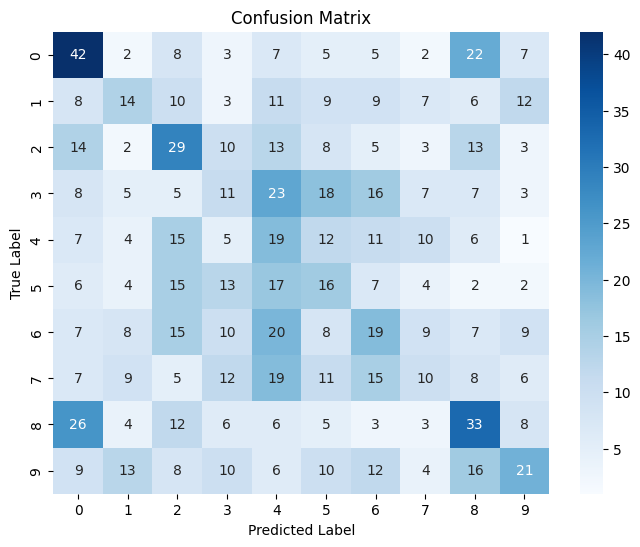

In [10]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
